# read data

In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

#使用pandas模組讀取excel資料;u表示unicode編碼;sheetname=1表示第二張工作表，0表示第一張;skiprows=3表示前四行略過
df = pd.read_excel(u'K:\\20171027資料前處理\\變數提取\\降水10和降水異類53\\11-降水10降水異類53(樞紐分析).xlsx',sheetname=3)
#顯示前5行資料
df.head(2)

,lon,lat,ID,1644,1645,1646,1647,1648,1649,1650,...,1902,1903,1904,1905,1906,1907,1908,1909,1910,1911
0,121.494508,31.339228,11000,1,0,0,1,4,0,1,...,0,1,0,0,0,0,0,0,0,0
1,121.636161,31.230935,11001,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# # 每年每一地點條目數分布 scatter plot

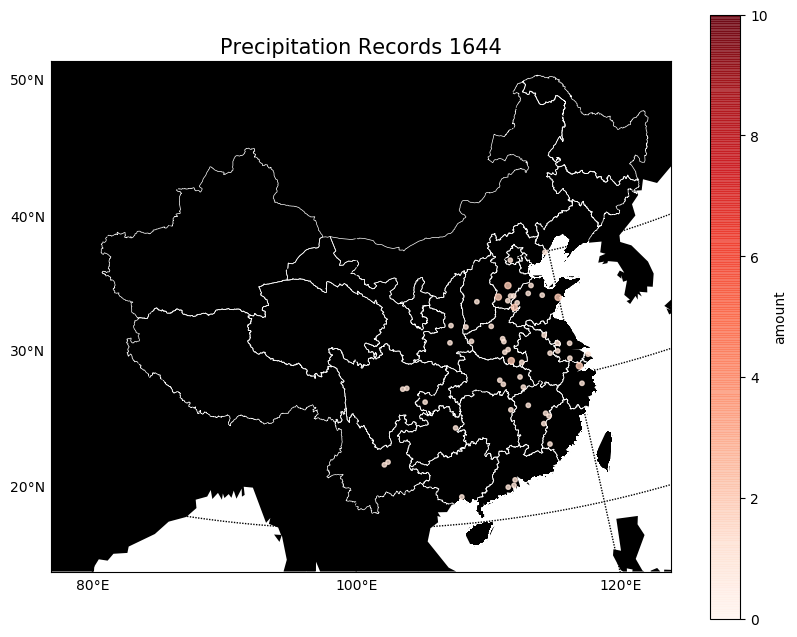

In [2]:
#%matplotlib inline 

#scatter plot
yr = 3

#1644-1911 = 268 years
#while yr <= 270 :
while yr <= 3 :    
    plt.figure(figsize=(10,8),dpi=100)
    #m = Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=41, projection='lcc', lat_1=33, lat_2=45, lon_0=100)
    m = Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, projection='lcc', lat_1=33, lat_2=45, lon_0=100)
    m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\CHN_adm_shp\CHN_adm1', 'states', drawbounds=True, color='white')
    m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\TWN_adm_shp\TWN_adm0', 'taiwan', drawbounds=True, color='white')
    
    # 绘制经纬线
    m.drawparallels(np.arange(-90., 91., 10.), labels=[1,0,0,0], fontsize=10)
    m.drawmeridians(np.arange(-180., 181., 20.), labels=[0,0,0,1], fontsize=10)

    m.fillcontinents('black', 
                 lake_color='black')
    #m.drawcountries(linewidth=1, linestyle='solid', color='white', zorder=30)
    numbers = df.iloc[:,yr]
    #lats = list(df['lat'])
    #lons = list(df['lon'])
    lons = list(df.iloc[:,0])
    lats = list(df.iloc[:,1])
    #x,y = m(lon, lat)
    x1, y1 = m(lons, lats) # Convert coords to projected place in figure
    m.scatter(x1, y1, 
          s=np.array(numbers)*10, 
          marker="o", 
          c=numbers,
          cmap='Reds',
          vmin=0,
          vmax=10,    
          zorder=10,
          alpha=0.8)
    plt.colorbar(label='amount')
    startyear = yr + 1641
   
    plt.title('Precipitation Records '+ str(startyear)  ,fontsize=15)
    #plt.savefig(u'K:\\20171027資料前處理\\變數提取\\降水10和降水異類53\\'+'PrecipitationRecords'+ str(startyear) + '_IDs_20180117.jpg')

    plt.show()
    yr += 1

# 每年每一地點條目數分布 scatter plot

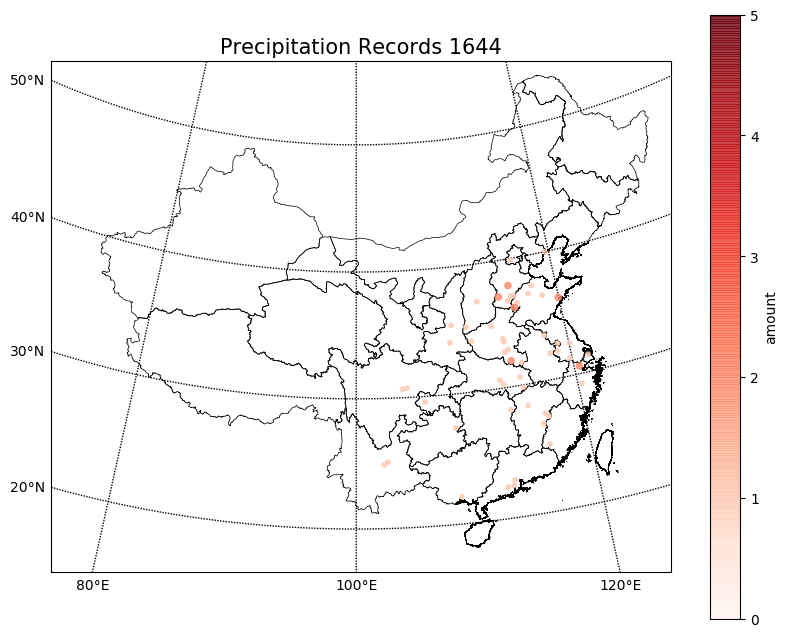

In [4]:
#%matplotlib inline 

#scatter plot
yr = 3

#1644-1911 = 268 years
#while yr <= 270 :
while yr <= 3 :    
    plt.figure(figsize=(10,8),dpi=100)
    #m = Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=41, projection='lcc', lat_1=33, lat_2=45, lon_0=100)
    m = Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, projection='lcc', lat_1=33, lat_2=45, lon_0=100)
    m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\CHN_adm_shp\CHN_adm1', 'states', drawbounds=True, color='black')
    m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\TWN_adm_shp\TWN_adm0', 'taiwan', drawbounds=True, color='black')
    
    # 绘制经纬线
    m.drawparallels(np.arange(-90., 91., 10.), labels=[1,0,0,0], fontsize=10)
    m.drawmeridians(np.arange(-180., 181., 20.), labels=[0,0,0,1], fontsize=10)

    m.fillcontinents('white', 
                 lake_color='white')
    #m.drawcountries(linewidth=1, linestyle='solid', color='white', zorder=30)
    numbers = df.iloc[:,yr]
    #lats = list(df['lat'])
    #lons = list(df['lon'])
    lons = list(df.iloc[:,0])
    lats = list(df.iloc[:,1])
    #x,y = m(lon, lat)
    x1, y1 = m(lons, lats) # Convert coords to projected place in figure
    m.scatter(x1, y1, 
          s=np.array(numbers)*10, 
          marker="o", 
          c=numbers,
          cmap='Reds',
          vmin=0,
          vmax=5,    
          zorder=10,
          alpha=0.8)
    plt.colorbar(label='amount')
    startyear = yr + 1641
   
    plt.title('Precipitation Records '+ str(startyear)  ,fontsize=15)
    #plt.savefig(u'K:\\20171027資料前處理\\變數提取\\降水10和降水異類53\\'+'PrecipitationRecords'+ str(startyear) + '_IDs_20180117.jpg')

    plt.show()
    yr += 1

# 30年累加每一地點條目數分布

In [7]:
#%matplotlib inline 

#scatter plot
styr = 3
edyr = 33
#1644-1911 = 268 years
while edyr <= 268 :
    plt.figure(figsize=(10,8),dpi=100)
    #m = Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=41, projection='lcc', lat_1=33, lat_2=45, lon_0=100)
    m = Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, projection='lcc', lat_1=33, lat_2=45, lon_0=100)
    m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\CHN_adm_shp\CHN_adm1', 'states', drawbounds=True, color='black')
    m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\TWN_adm_shp\TWN_adm0', 'taiwan', drawbounds=True, color='black')
    #m.drawcoastlines()
    #m.drawcountries(linewidth=1)
    #m.shadedrelief()
    #m.bluemarble()
    #m.drawrivers()
    # Add Grid Lines
    # 绘制经纬线
    m.drawparallels(np.arange(-90., 91., 10.), labels=[1,0,0,0], fontsize=10)
    m.drawmeridians(np.arange(-180., 181., 20.), labels=[0,0,0,1], fontsize=10)

    m.fillcontinents('white', 
                 lake_color='white')
    #m.drawcountries(linewidth=1, linestyle='solid', color='black', zorder=20)
    numbers = np.sum(df.iloc[:,styr:edyr],axis=1)
    #lats = list(df['lat'])
    #lons = list(df['lon'])
    lons = list(df.iloc[:,0])
    lats = list(df.iloc[:,1])
    #x,y = m(lon, lat)
    x1, y1 = m(lons, lats) # Convert coords to projected place in figure
    m.scatter(x1, y1, 
          s=np.array(numbers), 
          marker="o", 
          c=numbers,
          cmap='Reds',
          vmin=1,
          vmax=30,    
          zorder=10,
          alpha=0.9)
    plt.colorbar(label='amount')
    startyear = styr + 1641
    endyear = edyr - 1 + 1641
    plt.title('Precipitation Records '+ str(startyear) + '-' + str(endyear) ,fontsize=15)
    plt.savefig(u'K:\\20171027資料前處理\\變數提取\\降水10和降水異類53\\'+'Precipitation30years_'+ str(startyear) + '-' + str(endyear) + '_IDs.jpg')
    #plt.legend(loc=1)
    #plt.show()
    styr = edyr 
    edyr = edyr + 30
#####################################################
plt.figure(figsize=(10,8),dpi=100)
    
m = Basemap(llcrnrlon=77, llcrnrlat=14, urcrnrlon=140, urcrnrlat=51, projection='lcc', lat_1=33, lat_2=45, lon_0=100)
m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\CHN_adm_shp\CHN_adm1', 'states', drawbounds=True, color='black')
m.readshapefile(r'C:\Users\Wang\Desktop\PythonTest\TWN_adm_shp\TWN_adm0', 'taiwan', drawbounds=True, color='black')
# 绘制经纬线
m.drawparallels(np.arange(-90., 91., 10.), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(-180., 181., 20.), labels=[0,0,0,1], fontsize=10)

m.fillcontinents('white', 
                 lake_color='white')
numbers = np.sum(df.iloc[:,styr:271],axis=1)


lons = list(df.iloc[:,0])
lats = list(df.iloc[:,1])

x1, y1 = m(lons, lats) # Convert coords to projected place in figure
m.scatter(x1, y1, 
          s=np.array(numbers), 
          marker="o", 
          c=numbers,
          cmap='Reds',
          vmin=1,
          vmax=30,    
          zorder=10,
          alpha=0.9)
plt.colorbar(label='amount')
startyear = styr + 1641
endyear = 1911
plt.title('Precipitation Records '+ str(startyear) + '-' + str(endyear) ,fontsize=15)
plt.savefig(u'K:\\20171027資料前處理\\變數提取\\降水10和降水異類53\\'+'Precipitation30years_'+ str(startyear) + '-' + str(endyear) + '_IDs.jpg')
#cmap=plt.cm.jet
    